In [4]:
import pandas as pd

In [6]:
train_df_path = "/Users/nijiayi/Stats_C161-261_Project/train_data_after_feature_selection.csv"
test_df_path = "/Users/nijiayi/Stats_C161-261_Project/test_data_after_feature_selection.csv"

### Select training data that are of label 1

In [7]:
from load_dataset import separate_labels

df_label_0, df_label_1 = separate_labels(file_path=train_df_path)
# We should generate label 1 data
# Make sure that df_label_0, df_label_1 are consistent
real_data = df_label_1

4it [00:04,  1.08s/it]


In [10]:
df_label_0.shape, df_label_1.shape

((3766407, 23), (47567, 23))

### Train TVAE Model

In [11]:
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df_label_1)
for column_name, properties in metadata.columns.items():
    if properties["sdtype"] not in ["numerical", "categorical"]:
        properties["sdtype"] = "categorical"
        properties.pop("pii", None)
metadata

{
    "METADATA_SPEC_VERSION": "SINGLE_TABLE_V1",
    "columns": {
        "city": {
            "sdtype": "categorical"
        },
        "series_dev": {
            "sdtype": "numerical"
        },
        "emui_dev": {
            "sdtype": "numerical"
        },
        "device_name": {
            "sdtype": "numerical"
        },
        "device_size": {
            "sdtype": "numerical"
        },
        "net_type": {
            "sdtype": "categorical"
        },
        "creat_type_cd": {
            "sdtype": "categorical"
        },
        "slot_id": {
            "sdtype": "numerical"
        },
        "spread_app_id": {
            "sdtype": "numerical"
        },
        "app_second_class": {
            "sdtype": "numerical"
        },
        "u_refreshTimes": {
            "sdtype": "categorical"
        },
        "u_feedLifeCycle": {
            "sdtype": "categorical"
        },
        "user_id_count": {
            "sdtype": "numerical"
        },
        "task

In [12]:
from sdv.single_table import TVAESynthesizer
synthesizer = TVAESynthesizer(metadata, verbose=True)
synthesizer.fit(df_label_1)

/Users/nijiayi/miniconda3/lib/python3.10/site-packages/sdv/single_table/base.py:119: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/Users/nijiayi/miniconda3/lib/python3.10/site-packages/sdv/single_table/base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(
Loss: -2.058: 100%|██████████| 300/300 [40:25<00:00,  8.09s/it] 


In [13]:
synthesizer.save('tvae_synthesizer.pkl')

### Sample Data

In [ ]:
# import joblib
# synthesizer = joblib.load("tvae_synthesizer.pkl")

In [15]:
# How many synthetic data we need?
num_generated_data_needed = df_label_0.shape[0] - df_label_1.shape[0]
print(num_generated_data_needed)
synthetic_data = synthesizer.sample(num_generated_data_needed)
synthetic_data.to_csv("tvae_synthesized_data.csv")

3718840


### Evaluation

In [2]:
from load_dataset import load_dataset
synthetic_data = load_dataset(file_path="tvae_synthesized_data.csv")

4it [00:03,  1.01it/s]


Evaluation: Fidelity

In [41]:
import joblib
synthesizer = joblib.load("tvae_synthesizer.pkl")
synthetic_data_fidelity = synthesizer.sample(df_label_1.shape[0])

In [42]:
real_data.shape

(47567, 24)

In [43]:
synthetic_data_fidelity.shape

(47567, 23)

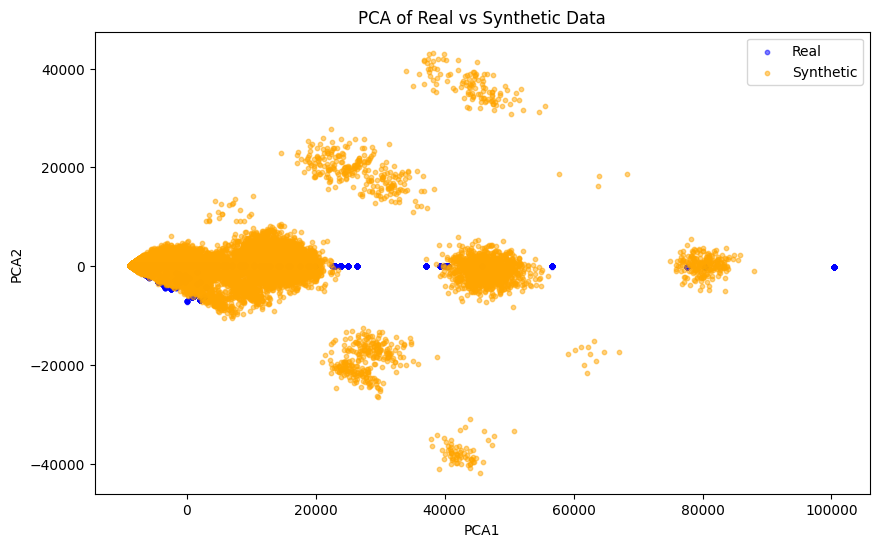

In [44]:
from evaluation.fidelity import *
# PCA
plot_pca(real_data=real_data, synthetic_data=synthetic_data_fidelity)

In [46]:
# ks_test
ks_test(real_data=real_data, synthetic_data=synthetic_data_fidelity)

                          Feature  KS Statistic        p-value
0                            city      0.229634   0.000000e+00
1                      series_dev      0.047953   5.733139e-48
2                        emui_dev      0.087329  2.872373e-158
3                     device_name      0.075662  7.338475e-119
4                     device_size      0.128009   0.000000e+00
5                        net_type      0.078437  1.016919e-127
6                   creat_type_cd      0.096096  1.292645e-191
7                         slot_id      0.051759   8.136127e-56
8                   spread_app_id      0.132802   0.000000e+00
9                app_second_class      0.041289   1.141723e-35
10                 u_refreshTimes      0.106376  8.145686e-235
11                u_feedLifeCycle      0.146257   0.000000e+00
12                  user_id_count      0.052242   7.416088e-57
13                  task_id_count      0.051674   1.231232e-55
14                   adv_id_count      0.045094   1.821

,Feature,KS Statistic,p-value
0,city,0.229634,0.000000e+00
1,series_dev,0.047953,5.733139e-48
2,emui_dev,0.087329,2.872373e-158
3,device_name,0.075662,7.338475e-119
4,device_size,0.128009,0.000000e+00
5,net_type,0.078437,1.016919e-127
6,creat_type_cd,0.096096,1.292645e-191
7,slot_id,0.051759,8.136127e-56
8,spread_app_id,0.132802,0.000000e+00
9,app_second_class,0.041289,1.141723e-35


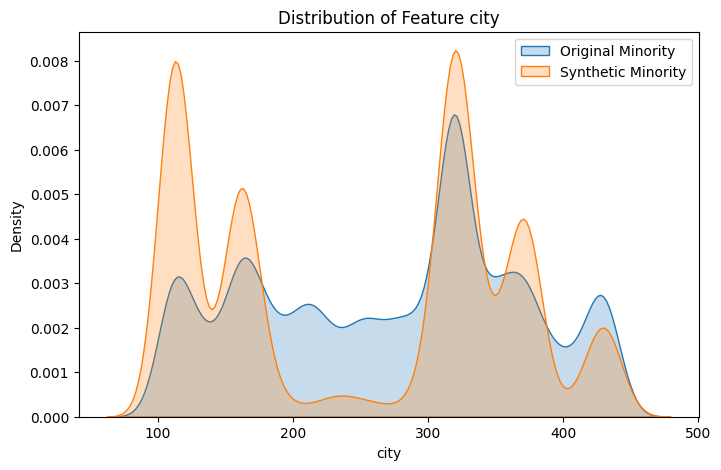

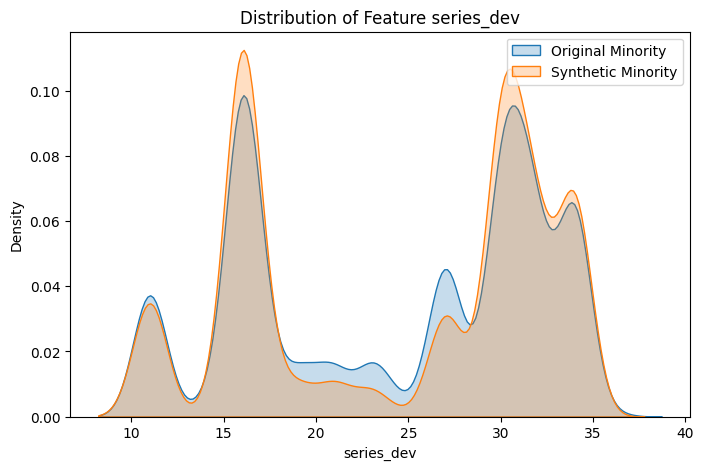

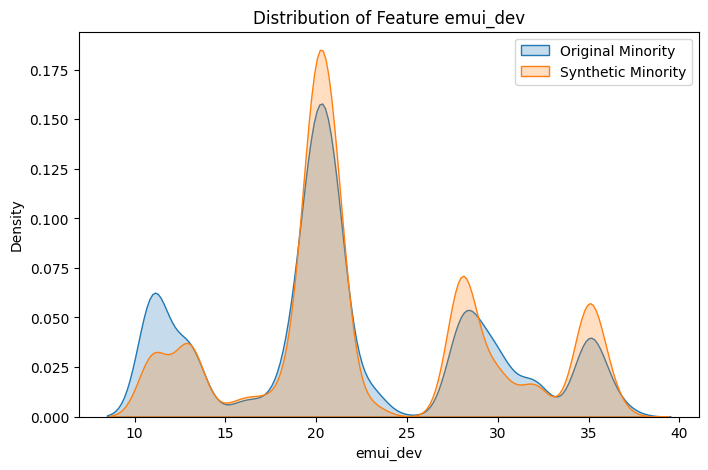

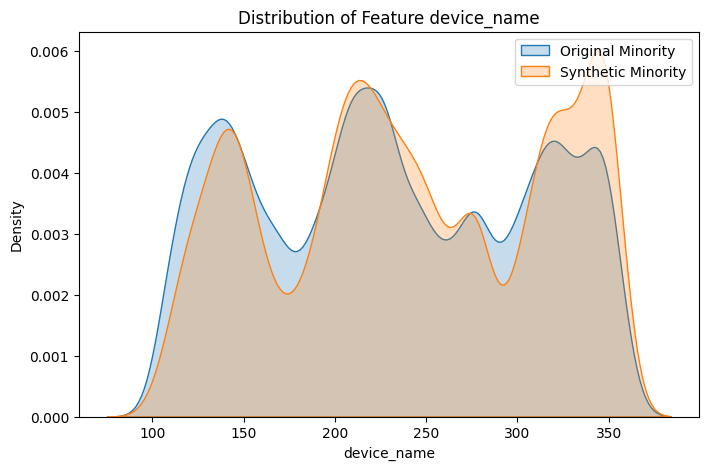

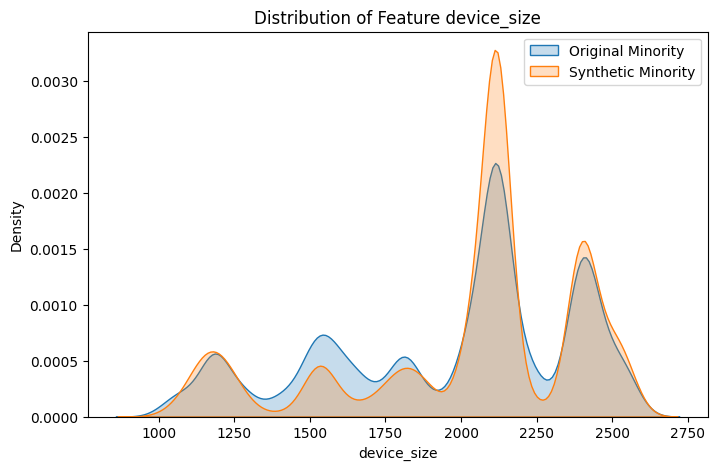

In [49]:
# KDE Plot
kde_plot(real_data=real_data, synthetic_data=synthetic_data_fidelity)

Evaluation: Utility

In [53]:
df_label_0.shape, df_label_1.shape, synthetic_data.shape

((3766407, 23), (47567, 24), (3718840, 25))

In [ ]:
# Train dataset + test datase
test_df = load_dataset(file_path="/Users/nijiayi/Stats_C161-261_Project/test_data_after_feature_selection.csv")

# Combine synthetic data and real data for the train set
combined_train_data = pd.concat([df_label_0, df_label_1, synthetic_data], ignore_index=True)
combined_train_data.to_csv("tvae_combined.csv")

X_train = combined_train_data.drop(columns=["label", "source", "Unnamed: 0"])
y_train = combined_train_data["label"]
X_test = test_df.drop(columns=["label"])
y_test = test_df["label"]

Evaluation metrics for logistic_regression:
ROC-AUC: 0.72705
Accuracy: 0.67032
Recall: 0.63564
F1-Score: 0.65848


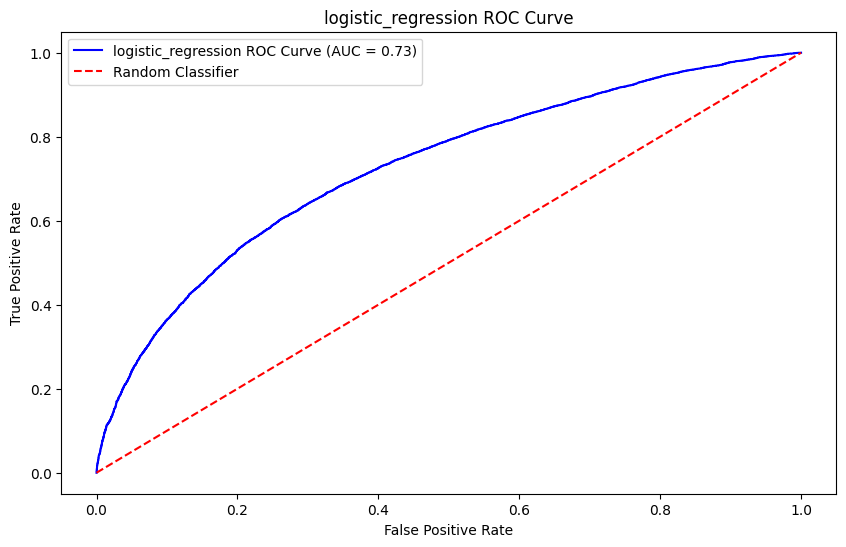

{'ROC-AUC': 0.727052070354233,
 'Accuracy': 0.6703245879582913,
 'Recall': 0.6356374032963337,
 'F1-Score': 0.6584781567141426}

In [56]:
from evaluation.utility import *
# Logistic Regression
evaluate(method="logistic_regression", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [57]:
X_train.shape

(7532814, 22)

Evaluation metrics for random_forest:
ROC-AUC: 0.75224
Accuracy: 0.57577
Recall: 0.15691
F1-Score: 0.27000


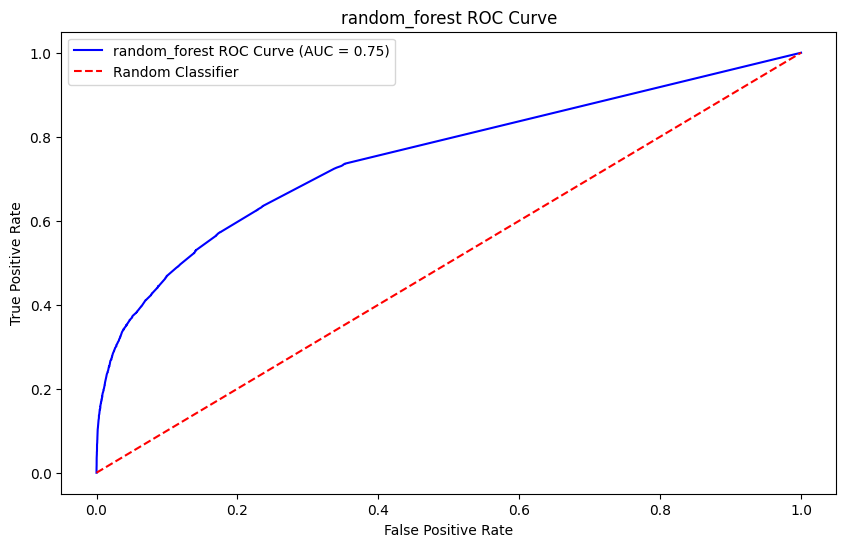

{'ROC-AUC': 0.7522430791519913,
 'Accuracy': 0.5757652203161789,
 'Recall': 0.156912209889001,
 'F1-Score': 0.27000434090580233}

In [58]:
# Random Forest
evaluate(method="random_forest", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Evaluation metrics for catboost:
ROC-AUC: 0.77315
Accuracy: 0.51976
Recall: 0.04045
F1-Score: 0.07768


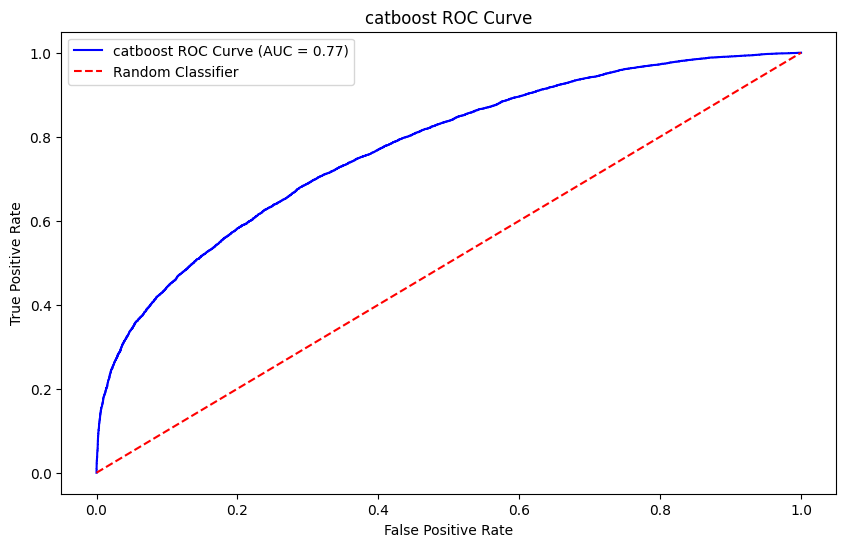

{'ROC-AUC': 0.7731545451840417,
 'Accuracy': 0.5197611839892364,
 'Recall': 0.04044735956945846,
 'F1-Score': 0.07768087855297158}

In [59]:
# Catboost
evaluate(method="catboost", X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)